# Extract and Clean Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
df = pd.read_csv("../diamonds.csv")   
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [21]:
df = df[(df['x'] != 0) & (df['y'] != 0) & (df['z'] != 0)]
df.shape

(53920, 10)

In [22]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [23]:
df.shape

(53920, 10)

In [24]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

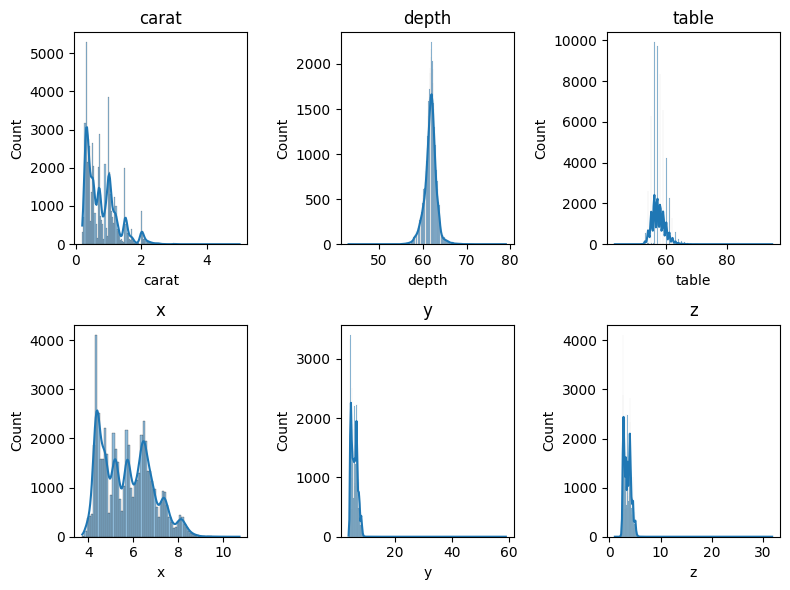


mean:
carat     0.797698
depth    61.749514
table    57.456834
x         5.731627
y         5.734887
z         3.540046
dtype: float64 , 
median:
carat     0.70
depth    61.80
table    57.00
x         5.70
y         5.71
z         3.53
dtype: float64 , 
std:
 carat    0.473795
depth    1.432331
table    2.234064
x        1.119423
y        1.140126
z        0.702530
dtype: float64


In [29]:
### Plot distribution of each continous feature
features_to_plot = ['carat', 'depth', 'table', 'x','y','z']
plt.figure(figsize=(8, 6))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()
print("\nmean:\n{} , \nmedian:\n{} , \nstd:\n {}".format(df[features_to_plot].mean() , 
                                                         df[features_to_plot].median(), 
                                                         df[features_to_plot].std()))

# Categorical Features

In [25]:
categorical_df = df.select_dtypes(include=['object'])
categorical_columns = categorical_df.columns
categorical_df

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


# Numerical Features

In [26]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
numerical_columns = numerical_df.columns
numerical_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


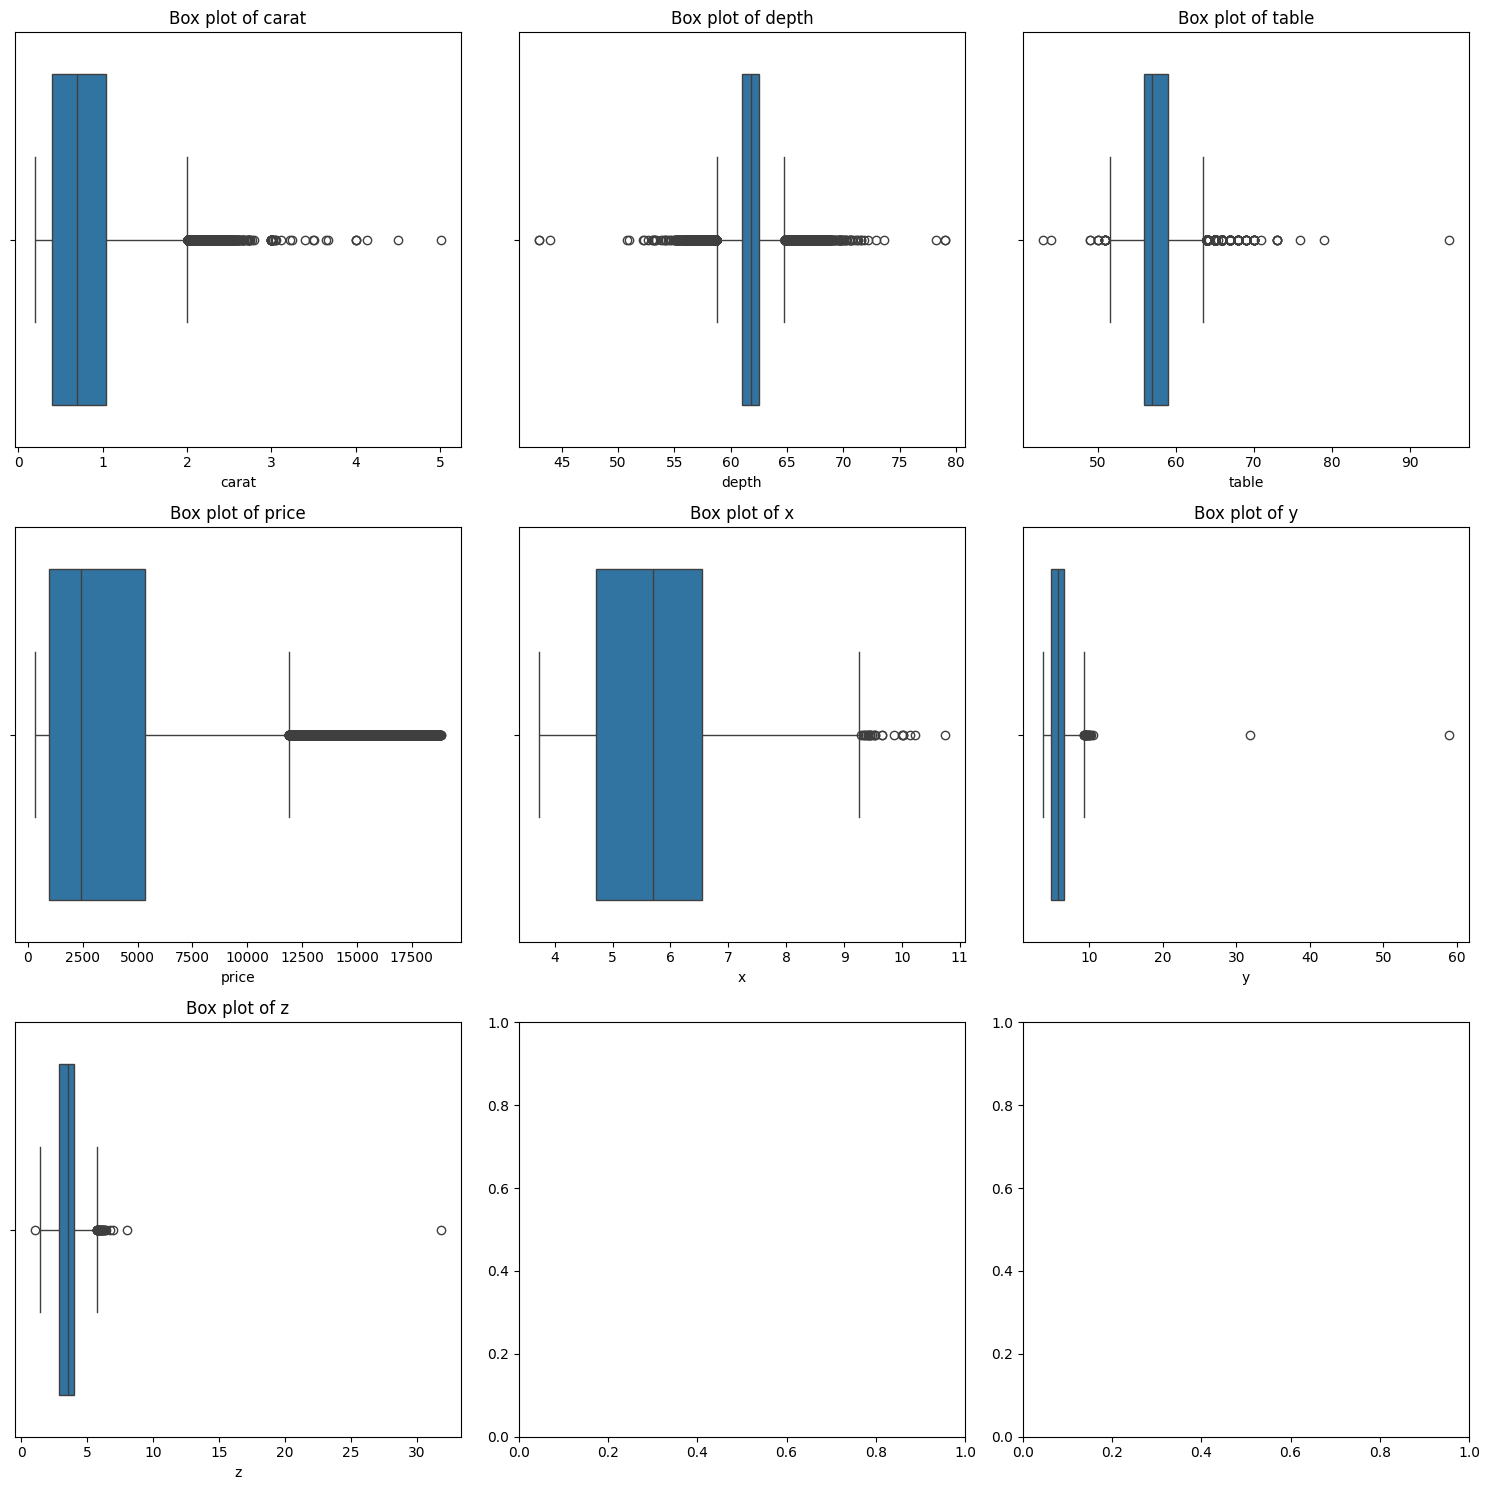

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns


n = len(numerical_columns)
n_cols = 3
n_rows = int(np.ceil(n / n_cols))

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*5))

for i, feature in enumerate(numerical_columns):
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(x=df[feature], ax=axs[row, col])
    axs[row, col].set_title(f'Box plot of {feature}')

plt.tight_layout()
plt.show()

In [58]:
for feature in numerical_columns:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    # only keep rows in the dataframe that have values within 1.5*IQR of Q1 and Q3
    df = df[~((df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR)))]

df.shape

(44540, 10)

# Encode Categorical Features

In [59]:
for column in categorical_columns:
    categories = df[column].unique()
    print(f"Categories for column '{column}': {categories.tolist()}")

Categories for column 'cut': ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories for column 'color': ['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories for column 'clarity': ['SI2', 'SI1', 'VS2', 'VVS2', 'VVS1', 'VS1', 'I1', 'IF']


In [60]:
le = LabelEncoder()

for feature in categorical_columns:
    df[feature] = le.fit_transform(df[feature])
    
df.shape

(44540, 10)

# Train Test Split and Scale Data

In [62]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
average_residuals = np.mean(np.abs(y_test - y_pred))
print(f"Average residuals: {average_residuals}")

Average residuals: 508.4718192511309


# Lasso Regression

In [64]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
average_residuals = np.mean(np.abs(y_test - y_pred))
print(f"Average residuals: {average_residuals}")

Average residuals: 515.1764335841809


# Ridge Regression

In [65]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
average_residuals = np.mean(np.abs(y_test - y_pred))
print(f"Average residuals: {average_residuals}")

Average residuals: 509.4331482771131


# Multi Layer Perceptron using PyTorch

In [66]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [67]:
# convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [68]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(9, 64) # Input layer
        self.fc2 = nn.Linear(64, 32) # Hidden layer
        self.fc3 = nn.Linear(32, 16) # Hidden layer
        self.fc4 = nn.Linear(16, 1) # Output layer

    def forward(self, x):
        x = F.relu(self.fc1(x)) # Activation function for input layer
        x = F.relu(self.fc2(x)) # Activation function for hidden layer
        x = F.relu(self.fc3(x)) # Activation function for hidden layer
        x = self.fc4(x) # No activation function for output layer
        return x

In [69]:
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Create a DataLoader instance
dataset = TensorDataset(X_train_tensor, y_train_tensor)
dataloader = DataLoader(dataset, batch_size=512, shuffle=True)

# Create an instance of your model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP().to(device)

def MAELoss(output, target):
    return torch.mean(torch.abs(output - target))

# Define a loss function and an optimizer
criterion = nn.L1Loss()  # Mean Absolute Error Loss
optimizer = optim.SGD(model.parameters(), lr=1e-7)  # Stochastic Gradient Descent

# Number of epochs (iterations over the entire dataset)
epochs = 100

for epoch in range(epochs):
    epoch_losses = []
    for inputs, price in dataloader:
        inputs, price = inputs.to(device), price.to(device)
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, price)
        epoch_losses.append(loss.item())
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
    if(epoch % 10 == 0 and epoch != 0):
        print(f'Epoch {epoch}/{epochs}, Average MAE Loss: {np.mean(epoch_losses)}')
    
    # Check if loss is NaN
    if torch.isnan(loss):
        print("Loss is NaN. Adjusting learning rate or batch size may help.")
        break
    
# Move test data to the device
X_test_tensor, y_test_tensor = X_test_tensor.to(device), y_test_tensor.to(device)

# Set the model to evaluation mode
model.eval()

# Make predictions on the test data
with torch.no_grad():
    predictions = model(X_test_tensor)

# Compute the loss on the test data
test_loss = criterion(predictions, y_test_tensor)

print(f'Test Loss: {test_loss.item()}')

torch.save(model.state_dict(), 'baseline.pth')

c:\Users\andre\anaconda3\envs\ecs171_env\Lib\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([512])) that is different to the input size (torch.Size([512, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
c:\Users\andre\anaconda3\envs\ecs171_env\Lib\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([304])) that is different to the input size (torch.Size([304, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch 10/100, Average MAE Loss: 2792.470731026786
Epoch 20/100, Average MAE Loss: 2791.3764404296876
Epoch 30/100, Average MAE Loss: 2792.200927734375
Epoch 40/100, Average MAE Loss: 2792.1191162109376
Epoch 50/100, Average MAE Loss: 2793.7192626953124
Epoch 60/100, Average MAE Loss: 2792.07099609375
Epoch 70/100, Average MAE Loss: 2791.9013741629465
Epoch 80/100, Average MAE Loss: 2792.114027622768
Epoch 90/100, Average MAE Loss: 2792.135323660714
Test Loss: 2799.256591796875


c:\Users\andre\anaconda3\envs\ecs171_env\Lib\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([8908])) that is different to the input size (torch.Size([8908, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
